In [124]:
import math
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio.Data import CodonTable
import matplotlib.mlab as mlab

In [2]:
# define global variables
aa_num = 21
E_thrhd = 0.01

In [3]:
file = open("grantham.dist4", "r")
original = []
for line in file.readlines():
    original.append(line.replace("\n", "").split("\t"))
file.close()

In [4]:
scaled_aa = pd.read_table("aa-scaled.txt", index_col=0)
scaled_aa

,polarity,hydropathy,volume,iso.electricity
aa,,,,
X,-1.5993,1.6720,-1.5833,-2.6562
A,-0.0796,0.6402,-0.9414,0.1086
R,0.7182,-1.3910,0.9842,2.3020
D,2.2000,-1.0686,-0.4652,-1.3798
N,1.0602,-1.0686,-0.4238,-0.1633
C,-0.9154,0.8659,-0.4445,-0.3199
E,2.0100,-1.0686,-1.4115,-1.1724
Q,0.5283,-1.0686,0.1767,-0.0527
G,0.2623,-0.0691,-1.5212,0.0948


In [5]:
amino_acid = scaled_aa.index
aa_distance = pd.DataFrame(np.NaN, index=amino_acid, columns=amino_acid)
for aa1 in scaled_aa.index:
    for aa2 in scaled_aa.index:
        Eu_dist = np.sqrt(np.square(scaled_aa.loc[aa1, 'polarity'] - scaled_aa.loc[aa2, 'polarity']) + np.square(scaled_aa.loc[aa1, 'hydropathy'] - scaled_aa.loc[aa2, 'hydropathy']))
        aa_distance.loc[aa1, aa2] = Eu_dist
Scaled_distance = aa_distance
Scaled_distance

aa,X,A,R,D,N,C,E,Q,G,H,...,L,K,M,F,P,S,T,W,Y,V
aa,,,,,,,,,,,,,,,,,,,,,
X,0.000000,1.836872,3.840934,4.684610,3.818878,1.057126,4.531880,3.469520,2.548918,3.346531,...,0.819043,3.732266,1.327602,1.039424,2.529622,2.533841,2.290876,2.077813,2.226558,1.020912
A,1.836872,0.000000,2.182260,2.848960,2.054055,0.865738,2.699338,1.813709,0.787402,1.697582,...,1.025856,1.944808,0.646707,0.825502,1.106688,0.859562,0.820207,1.107018,1.169847,0.939063
R,3.840934,2.182260,0.000000,1.516467,0.470006,2.786081,1.331424,0.374171,1.398308,0.496334,...,3.115678,0.615036,2.518393,2.822469,1.332796,1.338817,1.550237,1.882195,1.743674,3.104302
D,4.684610,2.848960,1.516467,0.000000,1.139800,3.667152,0.190000,1.671700,2.180294,1.750373,...,3.874312,1.113530,3.404406,3.655782,2.507580,2.263669,2.593786,3.079786,2.973342,3.750777
N,3.818878,2.054055,0.470006,1.139800,0.000000,2.765011,0.949800,0.531900,1.278923,0.615543,...,3.048639,0.165618,2.494024,2.781194,1.429694,1.288367,1.576006,2.007144,1.886150,2.993055
C,1.057126,0.865738,2.786081,3.667152,2.765011,0.000000,3.507172,2.413827,1.503729,2.290876,...,0.420919,2.683128,0.271045,0.123008,1.488288,1.477959,1.237735,1.106674,1.246216,0.626800
E,4.531880,2.699338,1.331424,0.190000,0.949800,3.507172,0.000000,1.481700,2.013320,1.560699,...,3.725182,0.925940,3.242590,3.499404,2.323801,2.089557,2.416572,2.897421,2.789196,3.610549
Q,3.469520,1.813709,0.374171,1.671700,0.531900,2.413827,1.481700,0.000000,1.034290,0.122991,...,2.741513,0.592260,2.145564,2.448889,0.976077,0.965614,1.180041,1.539966,1.407578,2.731839
G,2.548918,0.787402,1.398308,2.180294,1.278923,1.503729,2.013320,1.034290,0.000000,0.922577,...,1.769964,1.183839,1.235200,1.509495,0.627398,0.199285,0.503277,1.038389,0.993145,1.721455


In [30]:
original_order = pd.DataFrame(scaled_aa['polarity'].sort_values())
mini_order = original_order.index
original_order = pd.concat((original_order, pd.DataFrame(np.arange(aa_num), index=original_order.index, columns=["visitation"])), axis=1)
original_order = original_order.reindex(scaled_aa.index)
original_order

,polarity,visitation
aa,,
X,-1.5993,0
A,-0.0796,11
R,0.7182,16
D,2.2000,20
N,1.0602,17
C,-0.9154,1
E,2.0100,19
Q,0.5283,15
G,0.2623,13


In [7]:
np.array(original_order.loc[:, 'visitation'])

array([ 0, 11, 16, 20, 17,  1, 19, 15, 13, 14,  3,  2, 18,  6,  4, 10, 12,
        9,  5,  7,  8])

In [8]:
SGC_Matrix = np.zeros((aa_num, aa_num))
SGC_Matrix[np.arange(aa_num), np.array(original_order.loc[:, 'visitation'])] = 1
SGC_df = pd.DataFrame(SGC_Matrix, index=scaled_aa.index).astype(int)
SGC_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
aa,,,,,,,,,,,,,,,,,,,,,
X,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
N,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
C,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
polarity_dist = pd.DataFrame(np.NaN, index=amino_acid, columns=amino_acid)
for aa1 in scaled_aa.index:
    for aa2 in scaled_aa.index:
        polarity_dist.loc[aa1, aa2] = np.absolute(scaled_aa.loc[aa1, 'polarity'] - scaled_aa.loc[aa2, 'polarity'])
D = np.array(polarity_dist)
polarity_dist

aa,X,A,R,D,N,C,E,Q,G,H,...,L,K,M,F,P,S,T,W,Y,V
aa,,,,,,,,,,,,,,,,,,,,,
X,0.0000,1.5197,2.3175,3.7993,2.6595,0.6839,3.6093,2.1276,1.8616,2.0516,...,0.7219,2.6975,0.8738,0.7598,1.3677,1.7097,1.3677,0.8358,0.9118,0.9878
A,1.5197,0.0000,0.7978,2.2796,1.1398,0.8358,2.0896,0.6079,0.3419,0.5319,...,0.7978,1.1778,0.6459,0.7599,0.1520,0.1900,0.1520,0.6839,0.6079,0.5319
R,2.3175,0.7978,0.0000,1.4818,0.3420,1.6336,1.2918,0.1899,0.4559,0.2659,...,1.5956,0.3800,1.4437,1.5577,0.9498,0.6078,0.9498,1.4817,1.4057,1.3297
D,3.7993,2.2796,1.4818,0.0000,1.1398,3.1154,0.1900,1.6717,1.9377,1.7477,...,3.0774,1.1018,2.9255,3.0395,2.4316,2.0896,2.4316,2.9635,2.8875,2.8115
N,2.6595,1.1398,0.3420,1.1398,0.0000,1.9756,0.9498,0.5319,0.7979,0.6079,...,1.9376,0.0380,1.7857,1.8997,1.2918,0.9498,1.2918,1.8237,1.7477,1.6717
C,0.6839,0.8358,1.6336,3.1154,1.9756,0.0000,2.9254,1.4437,1.1777,1.3677,...,0.0380,2.0136,0.1899,0.0759,0.6838,1.0258,0.6838,0.1519,0.2279,0.3039
E,3.6093,2.0896,1.2918,0.1900,0.9498,2.9254,0.0000,1.4817,1.7477,1.5577,...,2.8874,0.9118,2.7355,2.8495,2.2416,1.8996,2.2416,2.7735,2.6975,2.6215
Q,2.1276,0.6079,0.1899,1.6717,0.5319,1.4437,1.4817,0.0000,0.2660,0.0760,...,1.4057,0.5699,1.2538,1.3678,0.7599,0.4179,0.7599,1.2918,1.2158,1.1398
G,1.8616,0.3419,0.4559,1.9377,0.7979,1.1777,1.7477,0.2660,0.0000,0.1900,...,1.1397,0.8359,0.9878,1.1018,0.4939,0.1519,0.4939,1.0258,0.9498,0.8738


In [10]:
K = np.random.random(size=(21, 21))
pd.DataFrame(K, index=amino_acid, columns=amino_acid)

aa,X,A,R,D,N,C,E,Q,G,H,...,L,K,M,F,P,S,T,W,Y,V
aa,,,,,,,,,,,,,,,,,,,,,
X,0.254913,0.941090,0.762526,0.970985,0.405914,0.891798,0.735252,0.943931,0.548699,0.542496,...,0.368493,0.788026,0.049383,0.361816,0.568512,0.129748,0.675846,0.191264,0.707174,0.516460
A,0.035674,0.303666,0.839924,0.207285,0.888969,0.153804,0.362283,0.260706,0.231488,0.669641,...,0.874994,0.519921,0.795638,0.116835,0.785364,0.761544,0.876716,0.721985,0.546656,0.713222
R,0.217207,0.149620,0.479735,0.686196,0.232590,0.176364,0.556858,0.679041,0.764539,0.322155,...,0.716710,0.324550,0.469851,0.298123,0.321997,0.277473,0.558856,0.696305,0.919920,0.521375
D,0.893564,0.509406,0.865343,0.531116,0.453627,0.310748,0.036203,0.058718,0.733125,0.156937,...,0.838198,0.973581,0.930306,0.858917,0.900926,0.968508,0.771472,0.215169,0.422812,0.844229
N,0.861226,0.061929,0.435617,0.236139,0.554581,0.897012,0.077432,0.709062,0.189614,0.823493,...,0.488754,0.467561,0.610303,0.625349,0.464262,0.196268,0.739944,0.018123,0.053165,0.025910
C,0.185320,0.466396,0.811960,0.145505,0.926132,0.390737,0.359401,0.486952,0.252775,0.930477,...,0.251731,0.610848,0.838570,0.714580,0.671800,0.186953,0.616611,0.181685,0.126748,0.030701
E,0.109355,0.560329,0.130817,0.192292,0.459165,0.754052,0.381478,0.911842,0.168326,0.536678,...,0.021860,0.975173,0.795412,0.174711,0.810612,0.815332,0.183560,0.472169,0.613807,0.968706
Q,0.803297,0.852170,0.741202,0.929393,0.034583,0.406566,0.241713,0.553770,0.282969,0.634668,...,0.794520,0.714874,0.006232,0.798036,0.499546,0.330174,0.246040,0.692381,0.640926,0.891573
G,0.506475,0.901930,0.921598,0.096062,0.412262,0.285657,0.573320,0.667134,0.437017,0.662120,...,0.447610,0.745234,0.773498,0.810438,0.146335,0.210778,0.194024,0.745864,0.195502,0.824496


In [11]:
def I(i):
    if i + 1 > aa_num - 1:
        return(i - 1, 0)
    elif i - 1 < 0:
        return(aa_num - 1, i + 1)
    else:
        return(i - 1, i + 1)

In [91]:
def TSP(dmax, temp):
    T = temp # declare temperature T
    dp = dmax * D.max() # declare the weight of colunm constraint
    delta_E = 100 # define delta_E
    e = 0 # declare energy e in the previous round
    V = np.random.random((aa_num, aa_num))
    
    while delta_E > E_thrhd:
        E = 0
        for X in range(aa_num):
            Uxi_exp_accum = 0
            Uxi_ls = []
            for i in range(aa_num):
                cstr = 0
                dist = 0
                # calculate Uxi
                for Y in range(aa_num):
                    if Y != X:
                        cstr += V[Y, i]
                        dist += D[X, Y] * (V[Y, I(i)[0]] + V[Y, I(i)[1]])
                Uxi = - dp * cstr - dist

                Uxi_ls.append(Uxi)
                Uxi_exp_accum += np.exp(Uxi / T)
            # update Vxi
            for i in range(aa_num):
                V[X, i] = np.exp(Uxi_ls[i] / T) / Uxi_exp_accum
                # calculate energy E
                E += - V[X, i] * Uxi_ls[i]

        # update delta_E
        delta_E = np.absolute(E - e)
        # update previous energy e
        e = E
        
    # create an output matrix with 0 & 1 being its neural state
    col_max_ix = V.argmax(axis=1)
    K = np.zeros((aa_num, aa_num))
    K[np.arange(aa_num), col_max_ix] = 1
    
    # verify tour
    try:
        if len(np.unique(np.where(K == 1)[1])) == aa_num:
            return(E, K)
        else:
            return(False)
    except:
        return(False)
outputs = TSP(0.6, 0.2)
outputs

(17.728134496993931,
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.

In [92]:
def distance(V):
    aa_ix = np.where(V == 1)[0]
    vt_ix = np.where(V == 1)[1]
    visitation = []
    total_distance = 0
    for i in range(aa_num):
        curr_aa = int(aa_ix[np.where(vt_ix == i)])
        next_aa = int(aa_ix[np.where(vt_ix == I(i)[1])])
        #pair_aa = np.array([curr_aa, next_aa])
        #visitation.append(pair_aa)
        total_distance += D[curr_aa, next_aa]
    return(total_distance)
distance(outputs[1])

8.7384000000000004

In [93]:
distance(SGC_Matrix)

7.5985999999999994

In [127]:
def simulator(dmax, temp, replicates):
    E_ls = []
    D_ls = []
    V_ls = []
    n = 0
    total_trial = 0
    while n <= replicates and total_trial <= 5000:
        tmp_out = TSP(dmax, temp)
        total_trial += 1
        if not tmp_out == False:
            E_ls.append(tmp_out[0])
            D_ls.append(distance(tmp_out[1]))
            V_ls.append(tmp_out[1])
            if n % 10 == 0:
                print("%d complete!" % (n))
            n += 1
    valid_rate = replicates / total_trial
    return(E_ls, D_ls, V_ls, valid_rate, duration)
summary = simulator(0.4, 0.1, 100)

0 complete!
10 complete!
20 complete!


In [128]:
# 0.4, 0.1, 100
outputs_2 = summary

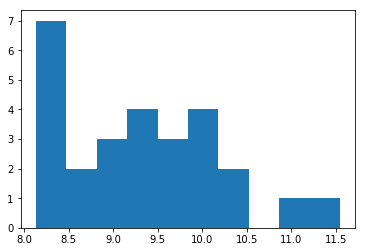

In [138]:
plt.hist(outputs_2[1])
plt.show()

In [126]:
# 0.5, 0.2, 100
outputs_1 = summary

In [156]:
outputs_1[3]

0.05370569280343716

In [157]:
outputs_2[3]

0.01999600079984003

In [155]:
distance(SGC_Matrix)

7.5985999999999994

In [154]:
np.array(outputs_1[1]).min()

7.6745999999999999

In [153]:
(np.array(outputs_1[1]).min() - distance(SGC_Matrix)) / distance(SGC_Matrix)

0.010001842444660927

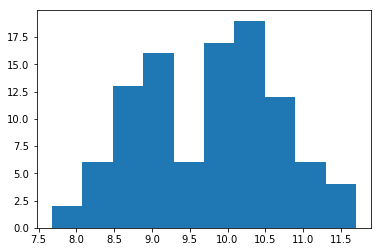

In [140]:
plt.hist(outputs_1[1])
plt.show()

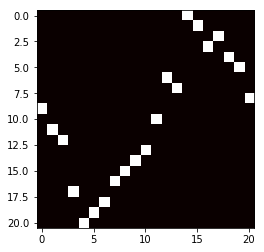

In [147]:
def visualize(summary):
    dist = np.array(summary[1])
    mini_ix = int(np.where(dist == dist.min())[0])
    out_df = pd.DataFrame(summary[2][mini_ix], index=scaled_aa.index).astype(int)
    plt.imshow(out_df.reindex(mini_order), cmap='hot', interpolation='nearest')
    plt.show()
visualize(outputs_1)

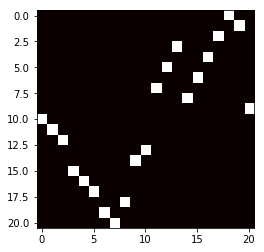

In [148]:
visualize(outputs_2)

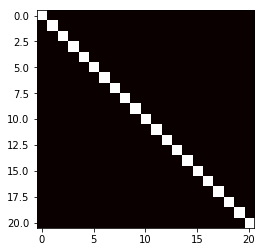

In [33]:
plt.imshow(SGC_df.reindex(mini_order), cmap='hot', interpolation='nearest')
plt.show()